# Assignment A1 [35 marks]



The assignment consists of 4 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Linear Algebra [8 marks]

**1.1** Using the method of your choice, solve the linear system $Ax = b$ with

$$ A = \begin{pmatrix}
          1 &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{and} \qquad 
    b = \begin{pmatrix}
           5.2 \cr 0.1 \cr 1.9 \cr 0
        \end{pmatrix},
$$

and compute the residual norm $r = \|Ax-b\|_2$. Display the value of $r$ in a clear and easily readable manner.

**[2 marks]**

In [20]:
'''Note: for markdown cells I have considered how Latex formulae/expressions appear 
in Gradescope submission, not how they appear in Github itself 
(Gradescope's rendering of the Latex formulae stored in Github is slightly larger)'''

#Question 1:

import numpy as np #import numpy

def system_solver(A,b): 
    '''Define a function that will solve a system of linear equations represented 
    by a matrix A and a vector b. The function will use Gaussian elimination'''
    
    def row_op(A, alpha, i, beta, j): 
        '''This function applies row operation beta*A_j + alpha*A_i to A_j,
        the jth row of the matrix A. Changes A in place. This function and the
        description is taken from the week04 tutorial for Computing and Numerics.
        '''
        A[j, :] = np.add(beta * A[j, :], alpha * A[i, :])
        
    def switch_nonzero(A ,p , q):
        '''If a element [p,q] in matrix is zero, this function switches row p with one
        below it in which the element in column q is not zero'''
        latch1 = 0 #create a zero variable
        
        for i in A[p:,q]: #find first element in relevant column below A[p,q] which is not 0.
            if i != 0:
                latch1 = list(A[:, q]).index(i) #save index of that element in column 
                break #break loop
                
        A[[p,latch1], :] = A[[latch1, p], :] #switch the two rows
        

    '''Now make function construct the augmented matrix (A|b) and apply the necessary
    row operations using row_op() so as to reduce (A|b) to Reduced Row Echelon form. This code
    is an adapted version of REF() function that I wrote during week04 tutorial of Computing and Numerics'''
        
    n = b.shape[0] #save length of b (i.e the number of rows)
    C = np.c_[A, b] #Concactenate A and b into augmented matrix C using numpy._c
        
    D_list=[C.copy()] #Initiate list of Augmented matrix after each operation (this is for reference in part 1.3)
        
    for i in range(n): #loop over the rows of augmented matrix to create REF
        if C[i,i]==0: #if the element in position [i,i] is zero we apply the row switch function
            switch_nonzero(C,i,i)
            D_list.append(C.copy()) #Append matrix after operation to D_list. Will be used in part 3
            
        if C[i, i]!=0: #if element on diagonal is not 1
            row_op(C, 0, 0, 1 / C[i, i], i) #Divide Row i by the element in position [i,i] to get a one on diagonal
            D_list.append(C.copy()) #Append matrix after operation to D_list. Will be used in part 3
            
        for j in range(i + 1, n): #Loop over rows below relevant leading 1 we just created
            row_op(C, -C[j, i], i, 1, j) #Create zeros below the one on the diagonal for the ith row
            D_list.append(C.copy()) #Append matrix after each operation to D_list  
    
    #Matrix should now be in REF 

    #Similar to process above, but this time working upwards in the matrix to make  RREF:       
    for i in reversed(range(n)): #loop over rows starting at bottom
        for j in reversed(range(i)): #loop over elements above leading ones
            row_op(C, -C[j, i], i, 1, j) #Produce zeros above leading one of relevant row
            D_list.append(C.copy()) #We again append a copy of C to D_list after each operation
    
    #Matrix should now be in RREF
    
    d = C[:, -1] #d is now vector containing solutions
    C = C[:, :-1] #C is identity matrix
        
    return C,d,D_list #make function return identity matrix, solution vector and list of
    #how matrix looks after each op

def res_norm(A,b): 
    '''Define res_norm() function which finds residual 2norm.'''
    Ax_b=(A@system_solver(A,b)[1])-b #find vector Ax_b=Ax-b where x is vector of solutions of linear system
    r=np.sqrt(sum([i**2 for i in Ax_b])) #r is residual norm: square root of the sum of squares of differences Ax-b
    return r

#Define the relevant arrays A and b
A=np.array([[1.0,1.0,0.0,1.0],
           [-1.0,0.0,1.0,1.0], 
           [0.0,-1.0,0.0,-1.0],
           [1.0,0.0,1.0,0.0]])
b=np.array([5.2,0.1,1.9,0.0])


#Print solutions
print(f'The system of solutions is {system_solver(A,b)[1]}')
print()
print(f'Residual norm r={res_norm(A,b)}')

The system of solutions is [  7.1 -16.2  -7.1  14.3]

Residual norm r=3.9511502286300045e-15


**1.2** Repeat the same calculations for the matrix

$$ A = \begin{pmatrix}
          a &  1 & 0 & 1  \\ 
         -1 &  0 & 1 & 1  \\ 
          0 & -1 & 0 & -1  \\ 
          1 & 0 & 1 & 0 
        \end{pmatrix}
        \qquad \text{with} \qquad a \in \{10^{-8}, 10^{-10}, 10^{-12}\}. 
$$

Display the value of $r$ for each value of $a$, and avoid repeating (copy+pasting) code.

**[3 marks]**

In [2]:
a_list=[10**(-8), 10**(-10), 10**(-12)] #Make a list containing the 'a's

for a in a_list: #Iterate over relevant elements of list a to produce relevant residual norms
    A[0,0]=a #change a for each iteration
    print(f'For a={a} the system of solutions is {system_solver(A,b)[1]}') #print the system of solutions
    print(f'For a={a} we have r={res_norm(A,b)}') #print the residual norm
    print() #add some spacing

For a=1e-08 the system of solutions is [ 7.09999984e+08 -1.42000002e+09 -7.10000009e+08  1.42000002e+09]
For a=1e-08 we have r=34.83209261112543

For a=1e-10 the system of solutions is [ 7.09998674e+10 -1.41999977e+11 -7.09999883e+10  1.41999977e+11]
For a=1e-10 we have r=170920.25204869633

For a=1e-12 the system of solutions is [ 7.09958094e+12 -1.41992087e+13 -7.10047098e+12  1.41992087e+13]
For a=1e-12 we have r=1226075882.9361339



**1.3** Summarise and explain your observations in a discussion of no more than $250$ words.

**[3 marks]**

In [3]:
print('Reference for task 1.3: how python completes row operations when a=10*(-12)') 
'''Here I attempt to display some of the errors python does in doing 
row operations when a=10**(-12)'''

A[0,0]=10**(-12) #Set a 

print('We now show how errors ocurr in the lower right corner of the '\
      +'Augmented Matrix C after certain Row operations')

 #Make list of strings that will clarify what row operation I am demonstrating
String_list=['C after Row op 4: R2*10^(-12)','C[2:,3:] after Row op 5: R3+R2 (add 1*R2 to R3)', 
             'C[2:,3:] after Row op 6: R4+10^(12)R2', 'C[2:,3:] after Row op 7: 10^(12)R3',
            'C[2:,3:] after Row op 8: R4-2*R3', 'C[2:,3:] after Row op 9: -1.000055730852182*R4',
            'C[2:,3:] after Row op 10: R3-1.000088900582341*R4']

def error_analysis(s, n): 
    '''Function which prints effect of given row operation in lower right corner 
    of augmented matrix and more accurate Python representation of those numbers. 
    Inputs are a string from the above list and an integer n referring to  
    matrix after given row operation stored in D '''
    print()
    np.set_printoptions() #Reset number of decimals numpy displays
    print(s) #print string s given
    
    if n==5: #If n is 5 we display entire matrix
        for i in system_solver(A,b)[2][5]:
            print(i)
        
    else: #if n not 5 only display lower right corner of matrix
        for i in system_solver(A,b)[2][n][2:,3:]:
            print(i)
    print()
    #Set number of decimal places numpy shows in machine representation of number
    np.set_printoptions(formatter={'float': lambda x: "{0:0.25f}".format(x)}) 
    
    #Now display how python stores relevant numbers in part of matrix just displayed
    if n==5: #if n is 5 show numbers in C[1:,3:]
        print('Accurate to 25 d.p, Python stores C[1:,3:] as:')
        for i in system_solver(A,b)[2][5][1:,3:]:
            for j in i:
                print(np.array([j]))
        
    else: #If n not 5 only show python's representation of numbers in bottom corner
        print('Accurate to 25 d.p. Python stores these as:')
        for i in system_solver(A,b)[2][n][2:,3:]:
            for j in i:
                print(np.array([j]))
    print(20*'-')

    
for h in range(6): #Make error_analysis show its results for row operations 4 to 10 
    error_analysis(String_list[h], h+5) 
    
print()
#Now demonstrate how python stores some numbers
np.set_printoptions(formatter={'float': lambda x: "{0:0.55f}".format(x)}) #Set numpy to display 55 decimal places
print(f'How python stores 0.1: {str(np.array([0.1]))[1:-1]}')
print(f'How python stores 1+10^(-12): {str(np.array([1+10**(-12)]))[1:-1]}')
print()
print('Python floats are only guaranteed to be accurate to 15 sig figs:\n' \
      + '0.7500000000000006 == 0.7500000000000005 --> ' + str(0.7500000000000006 == 0.7500000000000005))
     

Reference for task 1.3:
We now show how errors ocurr in the lower right corner of the Augmented Matrix C after certain Row operations

C after Row op 4: R2*10^(-12)
[1.0e+00 1.0e+12 0.0e+00 1.0e+12 5.2e+12]
[0.0e+00 1.0e+00 1.0e-12 1.0e+00 5.2e+00]
[ 0.  -1.   0.  -1.   1.9]
[ 0.0e+00 -1.0e+12  1.0e+00 -1.0e+12 -5.2e+12]

Accurate to 25 d.p, Python stores C[1:,3:] as:
[1.0000000000010000889005823]
[5.2000000000000996536186904]
[-1.0000000000000000000000000]
[1.8999999999999999111821580]
[-1000000000000.0000000000000000000000000]
[-5200000000000.0000000000000000000000000]
--------------------

C[2:,3:] after Row op 5: R3+R2 (add 1*R2 to R3)
[1.0000889e-12 7.1000000e+00]
[-1.0e+12 -5.2e+12]

Accurate to 25 d.p. Python stores these as:
[0.0000000000010000889005823]
[7.1000000000000991207116385]
[-1000000000000.0000000000000000000000000]
[-5200000000000.0000000000000000000000000]
--------------------

C[2:,3:] after Row op 6: R4+10^(12)R2
[1.0000889e-12 7.1000000e+00]
[1.00012207 0.0996093

📝 ***Discussion for question 1.3***

Errors arise in solutions because many floating point values are approximated by the binary representation inherent to computers (doc.python.org). As shown above, the value python stores for 0.1 is 0.1000000000000000055511151231257827021181583404541015625 to 55 d.p. Floats are only guaranteed to be accurate to 15 significant figures (docs.python.org). (See last example above).

When multiplying small integers by very large ones, large errors arise because decimals are not exact. Errors accumulate as more Row operations are done. Errors are larger for smaller a because more erroneous numbers (from Python's representation) get magnified.
Consider case when $a=10^{-12}$. Using same method as in code and working by hand on paper we get REF of C:

$\begin{pmatrix}
1 & 10^{12} & 0 & 10^{12} & 5.2*10^{12} \\
0 & 1 & 10^{-12} & 1+10^{-12}& 5.2+10^{-13}\\
0 & 0 & 1 & 1 & 7.1*10^{12}+10^{-1}\\
0 & 0 & 0 & 1 & 1.42*10^{13}+10^{-1}
\end{pmatrix}$

The lower right corner is different from REF created by Python in task 1.2 (see C[2:, 3:] after row op 9).

Noticeable problems arise during 5th row operation on the original augmented matrix. At C[2,3], the result is not precisely $10^{-12}$, but $1.000088900582341e-12$ (see above). This is because Python represents the number $1+10^{-12}$ as $1.0000000000010000889005823$ to 25d.p. After 6th row op the result C[2,3] is $1.0001220703125000$ (to 16 d.p.). 7th op yields $1.0000889005823410$ in C[2,3].
8th op yields $-1.000055730852182$ in C[2,3] and $-14200000000000.098$ in C[3,4]. A big error arises after op 9 yields $14199208666000.83$ in C[3,4]. This value is unchanged for the REF python yields and is very different from that in the real REF (by several millions). 

Errors are magnified as Python iterates up to create zeros above leading 1s. These errors get expressed in residual norms.
 
Sources:
Floating Point Arithmetic: Issues and Limitations - Python Documentation \ URL:https://docs.python.org/3/tutorial/floatingpoint.html \\ 
Last updated: Feb 17, 2021 \\ 
Retrieved: Feb 20, 2021


---
## Question 2: Sums [10 marks]

Consider the sum

$$
S_N = \sum_{n=1}^N \frac{2n+1}{n^2(n+1)^2}.
$$

**2.1** Write a function `sum_S()` which takes 2 input arguments, a positive integer `N` and a string `direction`, and computes the sum $S_N$ **iteratively** (i.e. using a loop):
- in the direction of increasing $n$ if `direction` is `'up'`,
- in the direction of decreasing $n$ if `direction` is `'down'`.

For instance, to calculate $S_{10}$ in the direction of decreasing $n$, you would call your function using `sum_S(10, 'down')`.

**[3 marks]**

In [6]:
import numpy as np #import numpy so task can be run independently

def sum_S(N, direction): 
    '''See that each term in the sum above can also be expressed (1/n^2)-(1/((n+1)^2).
    This function calculates the sum in the task by exploiting this fact. For each n, (1/n^2) is only calculated 
    once so as to reduce number of calculations. Calculating the sum this way is much quicker and yields 
    the same result as doing (2n+1)/(n^2*(n+1)^2) for each n. The reason for this is that the two numbers (1/n^2) and 
    (1/((n+1)^2) will be of same order of magnitude. Thus, very little relative rounding error (if any at all)
    should occurr in the calculation (1/n^2)-(1/((n+1)^2) compared to (2n+1)/(n^2*(n+1)^2). More on rounding in 3.3'''
    
    the_sum = 0 #define an empty sum
    
    if direction == 'up': #conditional if direction is 'up'
        
        first_term = 1 #make variable first_term with initial value 1 since for n=1, (1/n^2)=1
        
        for n in range(1, N + 1): #loop over N number between 1 and N
            n_plus_1 = ((1 / (n + 1))**2) #define 1/((n+1)^2 for relevant n
            the_sum += first_term - n_plus_1 #compute (1/n^2)-(1/((n+1)^2) and add to the_sum
            first_term = n_plus_1 #set first_term to 1/((n+1)^2 to prepare for next iteration
        return the_sum, first_term #return the_sum as well as last first term (will be useful for 2.2)
    
    else: #if direction not 'up'. We use reverse process of 'up' method above
        
        second_term = ((1 / (N + 1))**2) #make variable second_term which is initially set to 1/((N+1)^2
        
        for n in reversed(range(1, N + 1)): #loop over reversed range between 1 and N
            n_term = ((1 / n)**2) #define 1/((n)^2 for relevant n
            the_sum += n_term - second_term #add (1/n^2)-(1/((n+1)^2) to the_sum
            second_term = n_term #set second_term to 1/n^2 to prepare for next iteration
            
        return the_sum

**2.2** The sum $S_N$ has the closed-form expression $S_N = 1-\frac{1}{(N+1)^2}$. We assume that we can compute $S_N$ using this expression without significant loss of precision, i.e. that we can use this expression to obtain a "ground truth" value for $S_N$.

Using your function `sum_S()`, compute $S_N$ iteratively in both directions, for 10 different values of $N$, linearly spaced, between $10^3$ and $10^6$ (inclusive).

For each value of $N$, compare the results in each direction with the closed-form expression. Present your results graphically, in a clear and understandable manner.

**[4 marks]**

Table 1: showing absolute error of each method (relative to closed form) for each N
N-value   |Error sum_S(N,"up") to 16 d.p. |Error sum_S(N,"down") to 16 d.p.
1000      |5.551115123125783e-16          |0.0
112000    |9.992007221626409e-15          |0.0
223000    |1.667554982986985e-13          |0.0
334000    |1.5989432000651504e-12         |0.0
445000    |2.3152590955533014e-12         |0.0
556000    |4.130251696210507e-12          |1.1102230246251565e-16
667000    |5.117350987404734e-12          |0.0
778000    |5.7129856401161305e-12         |0.0
889000    |6.099787341895535e-12          |0.0
1000000   |6.3651306447809475e-12         |0.0

Graphical representation of findings:


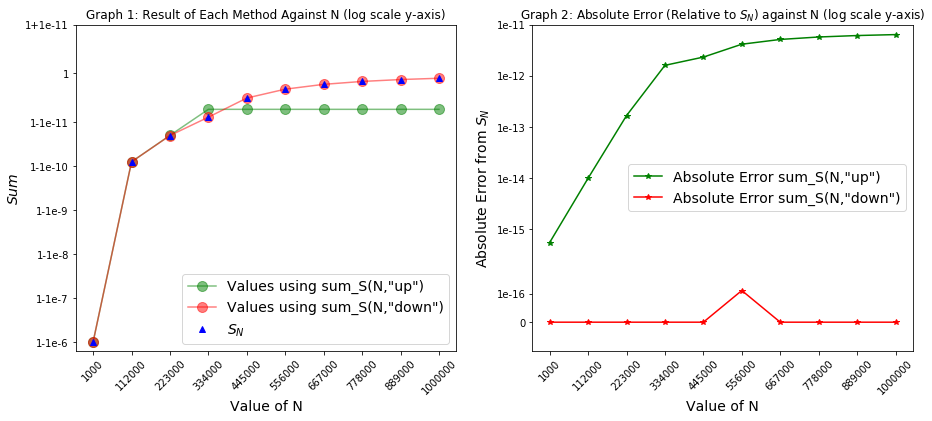

In [15]:
up_list = [] #List of sums for 'up' method
down_list = [] #List of sums for 'down' method
closed_list = [] #List of sums using closed-form expression
up_err = [] #absolute error of 'up' method
down_err = [] #absolute error of 'down' method


N_list = [int(N) for N in np.linspace(10**3, (10**6), num=10)] #define the N values as specified

for N in N_list: #Loop over the Ns to produce sums for 'up', 'down', and closed form methods
    
    up_sum, first_term = sum_S(N, 'up') #Get the up_sum and term 1/(N+1)^2 embodied by last first_term. 
    #Immediately extracting first_term reduces number of necessary calculations 
    #of square of very large numbers
    
    up_list.append(up_sum) #Append 'up' sum to list
    down_list.append(sum_S(N, 'down')) #Append 'down' sum to list
    closed_list.append(1 - first_term) #this follows from the definition of the closed-form expression
    
    #We compare methods by examining absolute error.
    up_err.append((abs(up_list[-1] - closed_list[-1]))) #Append absolute error of 'up' method
    down_err.append((abs(down_list[-1] - closed_list[-1]))) #Append error of down method

%matplotlib inline
import matplotlib.pyplot as plt #import matplotlib

#Here I make a small table to display errors of 'up' and down methods
print('Table 1: showing absolute error of each method (relative to closed form) for each N')
print('N-value' + 3 * ' ' + '|Error sum_S(N,"up") to 16 d.p. ' + 
      '|Error sum_S(N,"down") to 16 d.p.')
for i in range(10):
    print(str(N_list[i]) + (10 - len(str(N_list[i]))) * ' ' + '|' +
          str(up_err[i]) + (31 - len(str(up_err[i]))) * ' ' + '|' + str(down_err[i]))


#Graphical representation of findings: 
print('\nGraphical representation of findings:')

fig,ax=plt.subplots(1,2,figsize=(15, 6)) #construct two subplots next to each other

#In first plot, show sums of each method on log-yscale to better demonstrate differences
#In order to more easily construct a proper log-yscale, we subtract 1 from 
#all sum values and then reconfigure axis tick labels 
#(sums should be close to 1 due to closed form formula)
ax[0].plot(N_list, [i-1 for i in up_list], 'go-',markersize=10, label='Values using sum_S(N,"up")',\
           alpha=0.5) #Set opacity (alpha) to 0.5 to be able to differentiate overlapping data-points
ax[0].plot(N_list, [i-1 for i in down_list], 'ro-',markersize=10, \
           label='Values using sum_S(N,"down")', alpha=0.5)
ax[0].plot(N_list, [i-1 for i in closed_list],'b^', label=r'$S_N$')

#Set y-axis limits
ax[0].set_ylim(-10**(-5.8), 10**(-11))

#Make y-axis log10 and define a threshhold within which scale is not log to better see differences between methods
ax[0].set_yscale('symlog',linthreshy=10**(-11))

#Set x-ticks and labels
ax[0].set_xticks(N_list)
ax[0].set_xticklabels(N_list,rotation=45)
ax[0].set_xlabel('Value of N', fontsize=14)
ax[0].set_xlabel('Value of N', fontsize=14)

#Set y-ticks and y-axis label
ax[0].set_yticks([-10**(-i) for i in reversed(range(6,12))]+[0,10**(-11)])
ax[0].set_ylabel(r'$Sum$', fontsize=14)

#Reconfigure y-ticks to compensate the earlier subtraction of 1:
ax[0].set_yticklabels([f'1-1e-{i}' for i in reversed(range(6,12))]+[1,'1+1e-11'])

#Make legend and set title of graph
ax[0].legend(loc='lower right', fontsize=14)
ax[0].set_title(r'Graph 1: Result of Each Method Against N (log scale y-axis)')

#On second subplot demonstrate absolute error of 'up' and 'down method' against N
ax[1].plot(N_list, up_err, 'g*-', label='Absolute Error sum_S(N,"up")')
ax[1].plot(N_list, down_err, 'r*-', label='Absolute Error sum_S(N,"down")')
ax[1].set_ylim(-10**(-16), 10**(-11)) #Set limits of y-scale

#Again set threshold within whcih graph is not on log-scale so as to demonstrate on-time error of 'down' method
ax[1].set_yscale('symlog', linthreshy=10**(-15.7))
                 
#Set ticks, labels, legend, and title
ax[1].set_xticks(N_list)
ax[1].set_xticklabels(N_list,rotation=45)
ax[1].set_yticks([]) #Reset y_ticks
ax[1].set_yticks([0]+[10**(-i) for i in reversed(range(11,17))]) #make y axis increasing
ax[1].set_yticklabels([0]+[10**(-i) for i in reversed(range(11,17))])
ax[1].set_ylabel(r'Absolute Error from $S_N$', fontsize=14)
ax[1].set_xlabel('Value of N', fontsize=14)
ax[1].legend(loc='center right', fontsize=14)
ax[1].set_title(r'Graph 2: Absolute Error (Relative to $S_N$) against N (log scale y-axis)')


plt.show() #show graphs!

**2.3** Describe and explain your findings in no more that $250$ words. Which direction of summation provides the more accurate result? Why?

**[3 marks]**

In [6]:
print('Reference examples for 2.3')

#Set number of decimal places numpy displays:
np.set_printoptions(formatter={'float': lambda x: "{0:0.40f}".format(x)})
print('Sum of small numbers similar order of magnitude: 10^(-18)+3*10^(-18) = ' \
      + str(np.array([10**(-18)+3*10**(-18)]))[1:-1])
print('Sum of numbers of very different order of magnitude: 0.1+3*10^(-18)  = ' \
      + str(np.array([0.1+3*10**(-18)]))[1:-1])
print('We see that this is precisely the same as what python stores for 0.1 = ' \
      + str(np.array([0.1]))[1:-1])

Reference examples for 2.3
Sum of small numbers similar order of magnitude: 10^(-18)+3*10^(-18) = 0.0000000000000000040000000000000002861697
Sum of numbers of very different order of magnitude: 0.1+3*10^(-18)  = 0.1000000000000000055511151231257827021182
We see that this is precisely the same as what python stores for 0.1 = 0.1000000000000000055511151231257827021182


📝 ***Discussion for question 2.3***

The 'down' direction provides the more accurate result (graphs and table in 2.2). Many Floating point values stored by python are accurate only to 15 or 16 significant figures (due to storing in binary). After each addition of two numbers, Python rounds the resulting sum to a number it can represent correct to 15 or 16 significant figures (Goldberg, 1991). Notice that with 'down' method, Python adds numbers to the_sum in ascending order. Thus, the very small numbers do not suffer as much rounding error as they do in the 'up' method, where numbers are added in descending order (they get 'rounded away'). With 'down' method, the sum of the very small numbers grows to such a size that when it gets added to the bigger ones, less relative rounding error occurrs.

We illustrate this with an example that is shown above. Making numpy use 40 d.p we see that when doing a sum such as $10^{-18}+3*10^{-18}$, python stores the result as $0.0000000000000000040000000000000002861697$, which is accurate to 16 significant figures. 
However, when python does the sum $0.1+3*10^{-18}$ it stores the result as $0.1000000000000000055511151231257827021182$, which is precisely the same as how python stores 0.1.

Obviously, for small enough N, the 'up' method (with which we start by adding 'large' numbers to the_sum) will be relatively accurate since there are fewer extremely small numbers that get added to the_sum causing rounding error.

Additionally, as can be seen from graph 2, small rounding errors can also ocurr for 'down' method since the sum to which numbers are added is growing.

Source:

'What Every Computer Scientist Should Know About Floating-Point Arithmetic'\
Computing Surveys \
Goldberg, David \
March, 1991 \
URL: https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html

---
## Question 3: Numerical Integration [10 marks]

For integer $k \neq 0$ consider the integral 

$$
I(k) = \int_0^{2\pi}  x^4 \cos{k x} \ dx = \frac{32\pi^3}{k^2} - \frac{48\pi}{k^4} \ .
$$

**3.1** Write a function `simpson_I()` which takes 2 input arguments, `k` and `N`, and implements Simpson's rule to compute and return an approximation of $I(k)$, partitioning the interval $[0, 2\pi]$ into $N$ sub-intervals of equal width.

**[2 marks]**

In [16]:
import numpy as np #import matplotlib and numpy so task can be done independently
%matplotlib inline
import matplotlib.pyplot as plt

def simpson_I(k,N):
    '''This function returns the approximation for the integral using composite Simpson's rule 
    for a given value of k and when N subintervals are used (the quadrature splitting 
    each subinterval into 2 parts)'''
    
    def f(x,k): #Define the relevant function
        return (x**4)*np.cos(k*x)

    def quadrature(f, x, w, a, b, k): #Here I use the quadrature function and docstring from w06 tutorial 
        '''
        Approximates the integral of f over [a, b],
        using the quadrature rule with weights w
        and nodes x.
    
        Input:
        f (function): function to integrate (as a Python function object)
        x (Numpy array): vector containing all nodes
        w (Numpy array): vector containing all weights
        a (float): left boundary of the interval
        b (float): right boundary of the interval
    
        Returns:
        I_approx (float): the approximate value of the integral
        of f over [a, b], using the quadrature rule.
        '''
        # Define the shifted and scaled nodes
        yk = ((b-a)/2)*(x+1)+a
    
        # Compute the weighted sum
        I_approx = ((b-a)/2)*(sum(w*f(yk, k)))
    
        return I_approx
    
    xk=np.array([-1.,0.,1.]) #Define xk and wk for Simpson's as calculated in w06
    wk=np.array([1/3, 4/3, 1/3])
    
    bounds=np.linspace(0.0,2*np.pi,N+1) #Create an array of N+1 nodes representing bounds for subintervals
    the_sum=0 #Create variable of value zero named the_sum
    
    for i in range(N): #Run quadrature for each subsection contained in bounds and add to the_sum
        the_sum+=quadrature(f,xk,wk,bounds[i],bounds[i+1], k) 

    return the_sum #return the_sum which should now contain our approximation

**3.2** For $k = 1$, and for $\varepsilon \in \{10^{-n} \ |\  n \in \mathbb{N}, 3 \leqslant n \leqslant 8\}$, determine the number $N_{\text{min}}$ of partitions needed to get the value of the integral $I(1)$ correctly to within $\varepsilon$. 

**[2 marks]**

In [17]:
epsi_set=[10**(-i) for i in range(3,9)] #Define set of epsilons

def I_exact(k): #Define function which calculates exact integral for given k
    return ((32*(np.pi**3)/(k**2))-(48*np.pi/(k**4)))

def N_min_func(k):
    '''This function finds the N_min value for each epsilon given a certain k. 
    By formula for composite quadrature rules E=alpha*h^r in w06, this function assumes that error 
    is monotonically decreasing for decreasing h (increasing N). The function works by checking different 
    widely spaced values of N, in increasing order, for abs(simpson_I(k, M) - I_ex) > e. 
    When function reaches an N such that abs(simpson_I(k, M) - I_ex) <= e, it makes one jump backward and then starts
    making smaller increments in N to check the condition. It does this until jumps are of size 1 and it finds 
    N_min'''
    
    N_mins = [0] #Make N_min list with one element 0
    I_ex=I_exact(k) #Define the exact value of integral for the given k
    
    #Make list of 'jumps' in N-value that function will do to check error at different places:
    jump_list=[0, 500, 100, 20, 5, 1]
    
    for e in epsi_set: #Iterate over set of epsilons
        
        M=N_mins[-1] #First, set M to the last element in N_min since N for smaller epsilon is assumed to be larger
        #In other words, each epsilon should have an N_min which is larger than N_min for epsilon*10
        #this follows by the formula from week 06
        
        for j in range(1,6): #Iterate over the elements in jump_list
            
            M-=jump_list[j-1] #Take M minus previous element in M_list to make sure no values are 'skipped'
            
            #While error is larger than epsilon, keep adding relevant element in M_list to M:
            while abs(simpson_I(k, M) - I_ex) > e:
                M+=jump_list[j]
        
        #Append last value of M to N_mins since this will be smallest M for which abs(simpson_I(k, M) - I_ex) <= e
        N_mins.append(M)
        
    return N_mins[1:] #Return N_mins without the starting 0

print(f'N_min for k=1 (each successive element corresponds to tenfold decrease epsilon): \n{N_min_func(1)}')

N_min for k=1 (each successive element corresponds to tenfold decrease epsilon): 
[36, 63, 112, 198, 352, 626]


**3.3** Repeat your calculations from **3.2** for $k \in \{2^{n}\ |\ n \in \mathbb{N}, n \leqslant 6\}$. 

**[2 marks]**

In [13]:
A=[N_min_func(1)] #Initiate list to store N_mins for each value of k

ks=[1,2,4,8,16,32,64] #list of ks

for k in ks[1:]: #Iterate over k-values
    #Use N_min_func from previous cell
    mins=N_min_func(k) #Define mins so that N_min_func(k) does not have to be calculated twice.
    
    print(f'for k = {k} we have N_min = {mins} for e in epsi_set, respectively') #display results
    
    A.append(mins) #Append N_mins for each k to A
    
A=np.array(A) #make A an np.array

for k = 2 we have N_min = [51, 90, 159, 283, 503, 894] for e in epsi_set, respectively
for k = 4 we have N_min = [72, 127, 226, 401, 712, 1267] for e in epsi_set, respectively
for k = 8 we have N_min = [102, 180, 319, 567, 1008, 1792] for e in epsi_set, respectively
for k = 16 we have N_min = [144, 254, 451, 802, 1426, 2535] for e in epsi_set, respectively
for k = 32 we have N_min = [204, 360, 639, 1134, 2016, 3584] for e in epsi_set, respectively
for k = 64 we have N_min = [292, 511, 904, 1604, 2851, 5069] for e in epsi_set, respectively


**3.3** Present your results graphically by plotting 

(a) the number of terms $N_{\text{min}}$ against $\varepsilon$ for fixed $k$, 

(b) the number of terms $N_{\text{min}}$ against $k$ for fixed $\varepsilon$.

You should format the plots so that the data presentation is clear and easy to understand.

**[2 marks]**

Graphical representation of results:


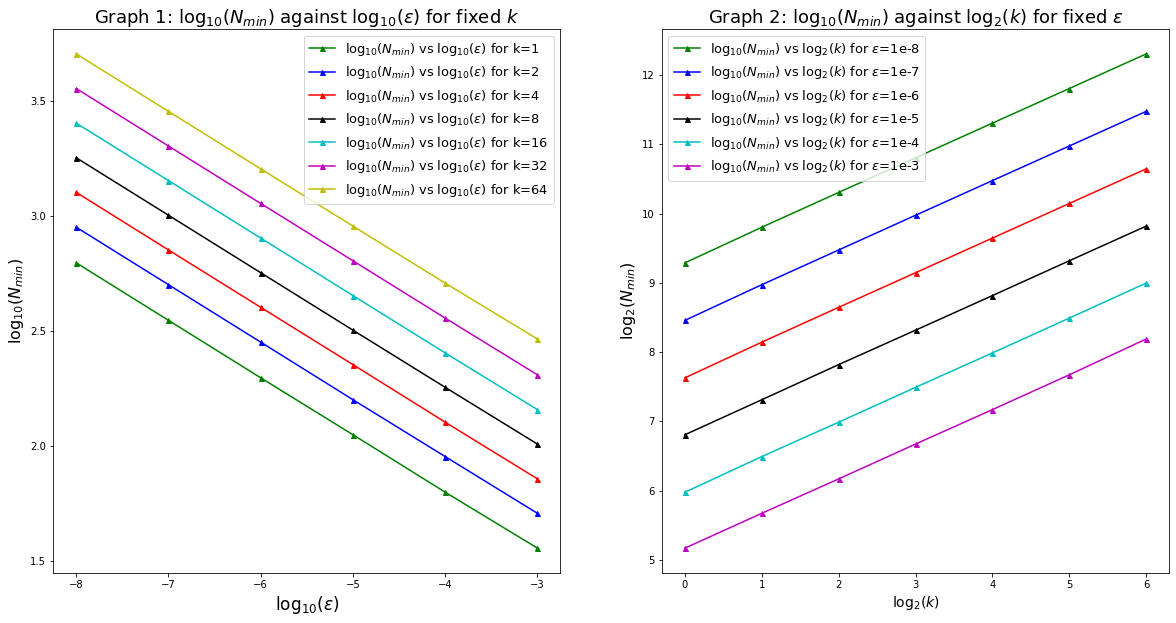

In [18]:
print('Graphical representation of results:')

fig,ax=plt.subplots(1,2,figsize=(20, 10)) #Create two subplots

#list of plot types that I will use in plot (color, marker, and line):
plot_types=['g^-', 'b^-', 'r^-', 'k^-', 'c^-', 'm^-', 'y^-']

#In first subplot we plot list of N_mins against increasing epsilon as stored in rows of A.
#In other words we plot epsilon against the minimum N such that |approximation - exact integral|=<epsilon 
#for constant k:

for i in range(7): #Loop over range 0-6 to plot reversed rows in A (in log10) against reversed epsi_set (in log10). 
    ax[0].plot(np.log10(epsi_set[::-1]),np.log10(A[i][::-1]), plot_types[i], markersize=5, \
               label=r'$\log_{10}(N_{min})$ vs $\log_{10}({\varepsilon})$ ' + f'for k={ks[i]}') 
    #note that I have reversed epsi_set and rows of A so that log10(epsilon) is growing along the x-axis
    
#Specify Title, axis labels, and location + size of legend for Graph 1:
ax[0].set_ylabel(r'$\log_{10}(N_{min})$', fontsize=16)
ax[0].set_xlabel(r'$\log_{10}({\varepsilon})$', fontsize=17)
ax[0].legend(loc='upper right', fontsize=13)
ax[0].set_title(r'Graph 1: $\log_{10}(N_{min})$ against $\log_{10}({\varepsilon})$ for fixed $k$', fontsize=18)

#----------------

#In second subplot we plot N_mins against relevant ks as stored in columns of A
#In other words we plot k against the minimum N such that |approximation - exact integral|=<epsilon 
#for constant epsilon

for i in range(6): #Loop over range 0-6 to plot columns in A (in log2 and starting at last column) against k's.
    ax[1].plot(np.log2(ks), np.log2(A[:,5-i]), plot_types[i], markersize=5, \
               label=r'$\log_{10}(N_{min})$ vs $\log_{2}({k})$ for $\varepsilon$=' + f'1e-{8-i}')

#Specify Title, axis labels, and location + size of legend for Graph 2:
ax[1].set_ylabel(r'$\log_{2}(N_{min})$', fontsize=16)
ax[1].set_xlabel(r'$\log_{2}({k})$', fontsize=14)
ax[1].legend(loc='upper left', fontsize=13)
ax[1].set_title(r'Graph 2: $\log_{10}(N_{min})$ against $\log_{2}({k})$ for fixed $\varepsilon$', fontsize=18)

plt.show() #show graphs!

**3.4** Discuss, with reference to your plot from 3.3, your results. Your answer should be no more than $250$ words.

**[2 marks]**

In [14]:
print('References for task 3.3:')
np.set_printoptions() #reset number of decimal places numpy displays

#Compute and print coefficients for lines of best fit for data points in Graph 1 (keeping k constant). 
#We do this using the inbuilt numpy function polyfit, which returns the coefficients for line of 
#best fit (highest degree first).


#Lines 20 and 35:
#Documentation consulted:
#The SciPy community
#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
#Accessed: 7.03.2021

print('Coefficients of log10(epsilon) in line of best fit for data points in Graph 1:')
print()
coeff1_sum=0 #create as sum of coefficients used for taking average later

#Use polyfit with log10(error) (error stored in reversed epsi_set) as independent variable 
#and log10(N_min) (stored in reversed rows of A) as dependent variable 
#Do this for each row of A:
for i in range(7):
    coefficient=np.polyfit(np.log10(epsi_set[::-1]), np.log10(A[i][::-1]),  1)[0] 
    print(r'Coefficient of log10(epsilon) ' + f'for k={ks[i]}: ' + str(coefficient))
    coeff1_sum+=coefficient #add to the sum of coefficients
print(20*'-')
print()

#Compute and print coefficients for lines of best fit for data points in Graph 2 (keeping epsilon constant):
print('Coefficients of log2(k) in line of best fit for data points in Graph 2:')
print()
coeff2_sum=0 #create a sum of coefficients used for taking average later

#Use polyfit with log2(k) (k stored in ks) as independent variable 
#and log2(N_min) (N_min stored in columns of A) as dependent variable 
#Do this for each column of A:
for i in range(6):
    coefficient = np.polyfit(np.log2(ks), np.log2(np.array(A)[:,i]), 1)[0]
    print(r'Coefficient of log2(k) ' + f'for epsilon={epsi_set[i]}: ' + str(coefficient))
    coeff2_sum+=coefficient #add to the sum of coefficients
print(20*'-')
print()

#Print average of coefficients for each of the above:
print(f'Average of coefficients Graph 1: {coeff1_sum/7}')
print(f'Average of coefficients Graph 2: {coeff2_sum/6}')

References for task 3.3:
Coefficients of log10(epsilon) in line of best fit for data points in Graph 1:

Coefficient of log10(epsilon) for k=1: -0.24829750491087738
Coefficient of log10(epsilon) for k=2: -0.24889149861553
Coefficient of log10(epsilon) for k=4: -0.24920815267932417
Coefficient of log10(epsilon) for k=8: -0.24908701784786505
Coefficient of log10(epsilon) for k=16: -0.2493123603132701
Coefficient of log10(epsilon) for k=32: -0.24906758414965802
Coefficient of log10(epsilon) for k=64: -0.2481846309677696
--------------------

Coefficients of log2(k) in line of best fit for data points in Graph 2:

Coefficient of log2(k) for epsilon=0.001: 0.5021320954397535
Coefficient of log2(k) for epsilon=0.0001: 0.5021320954397533
Coefficient of log2(k) for epsilon=1e-05: 0.5017448254727933
Coefficient of log2(k) for epsilon=1e-06: 0.5021213851195212
Coefficient of log2(k) for epsilon=1e-07: 0.5021863435274365
Coefficient of log2(k) for epsilon=1e-08: 0.5021220296238934
---------------

📝 ***Discussion for question 3.4***

For constant k, there is an approximately linear relationship between $\log_{10}{\varepsilon}$ and $\log_{10}{N_{min}}$ (graph 1). This is expressed in formula describing the error of composite quadrature rules (tutorial w06)
$$
\varepsilon = \alpha h^r = \alpha (\frac{1}{N})^r,
$$
which, when taking $\log_{10}$ on both sides, rearranges to
$$
\frac{-\log_{10}{\varepsilon} + \log_{10}{\alpha}}{r} = \log_{10}({N}).
$$



Since each $N_{min}$ is smallest N such that approximation error =< $\varepsilon$, consecutive data-points in Graph 1 do $not$ correspond to a decrease in N such that error of approximation increases $precisely$ tenfold (but almost so). However, by assuming it does, we can apply above formula if we remember that results will have some small error.

Using numpy's polyfit module, for constant k, the coefficient of the line of best fit between $\log_{10}{\varepsilon}$ and $\log_{10}{N_{min}}$ is always close to -0.249 (see above). Average of coefficients gives $\approx -0.2488641$. Treating $\log{\alpha}$ as a constant and using the formula:

$$
\log_{2}({N_2}) - \log_{2}({N_1}) = \frac{-\log_{10}{\varepsilon_1} - 1 + \log_{10}{\alpha}}{r} - \frac{-\log_{10}{\varepsilon_1} + \log_{10}{\alpha}}{r} \approx -0.2488641
$$
\
$$
\Rightarrow -0.2488641 \approx \frac{-1}{r},
$$

and thus

$$
 r \approx 4.018
$$
as approximate (to 4 d.p) rate of convergence of composite Simpson rule that we can extrapolate from data.

Graph 2 shows an approximate linear relationship between $\log_{2}{k}$ and $\log_{2}{N_{min}}$. Using polyfit (and keeping in mind the ineherent error as mentioned above), we get a coefficient always close to 0.502. Average $\approx 0.502073129$. In the above equation, changes to k must get expressed in $\alpha$.
Thus, treating $\varepsilon$ as constant, and considering change of 1 in $\log_{2}{k}$
$$
\log_{2}({N_2}) - \log_{2}({N_1}) = \frac{-\log_{2}{\varepsilon} + \log_{2}{\alpha_1} + \Delta\log_{2}{\alpha}}{r} - \frac{-\log_{2}{\varepsilon} + \log_{2}{\alpha_1}}{r} \approx 0.502073129
$$
\
$$
\Rightarrow \frac{\Delta\log_{2}{\alpha}}{r} \approx 0.502073129
$$
and thus
$$
\Delta\log_{2}{\alpha} \approx 2.017
$$ 
to 4 d.p. Written differently,
$$
\log_{2}{\alpha} \approx 2.017\log_{2}{k} + C
$$

$$
\large
\Rightarrow \alpha \approx 2^C*k^{2.017}
$$

The reason that larger $N_{min}$s result for larger $k$s for same $\varepsilon$ is that $x^4\cos(kx)$ gets compressed (quicker changes). Thus, the interpolating polynomials of degree two within Simpson's rule become less accurate (relative to actual graph). Since k changes at constant relative rate, the graph compresses at constant relative rate, leading to constant relative rate change in $\alpha$.

---
## Question 4: Numerical Derivatives [7 marks]

Derivatives can be approximated by finite differences in several ways, for instance

\begin{align*}
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x)}{h} \\
        \frac{df}{dx} & \approx \frac{f(x) - f(x-h)}{h}  \\
        \frac{df}{dx} & \approx \frac{f(x+h) - f(x-h)}{2h} \ . 
\end{align*}

Assuming $f$ to be differentiable, in the limit $h \to 0$, all three expressions are equivalent and exact, but for finite $h$ there are differences. Further discrepancies also arise when using finite precision arithmetic.

**4.1**
Estimate numerically the derivative of $f(x) = \cos(x)$ at $x = 1$ using the three expressions given above and different step sizes $h$. Use at least 50 logarithmically spaced values $h \in [10^{-16}, 10^{-1}]$.

**[2 marks]**

In [13]:
import numpy as np #import matplotlib and numpy so task can be run independently
%matplotlib inline
import matplotlib.pyplot as plt

h=np.logspace(-16,-1,num=100) #create array of 100 logarithmically spaced values in specified range

est1_list=(np.cos(1+h)-np.cos(1))/h #create array of values containing forward derivative approximations for each h
est2_list=(np.cos(1)-np.cos(1-h))/h #create array of values containing backward derivative approximations for each h
est3_list=(np.cos(1+h)-np.cos(1-h))/(2*h) #array of values containing centered derivative approximations for each h

**4.2**
Display the absolute difference between the numerical results and the
exact value of the derivative, against $h$ in a doubly logarithmic plot. 
You should format the plot so that the data presentation is clear and easy to understand.

**[2 marks]**

Graphical representation of results:


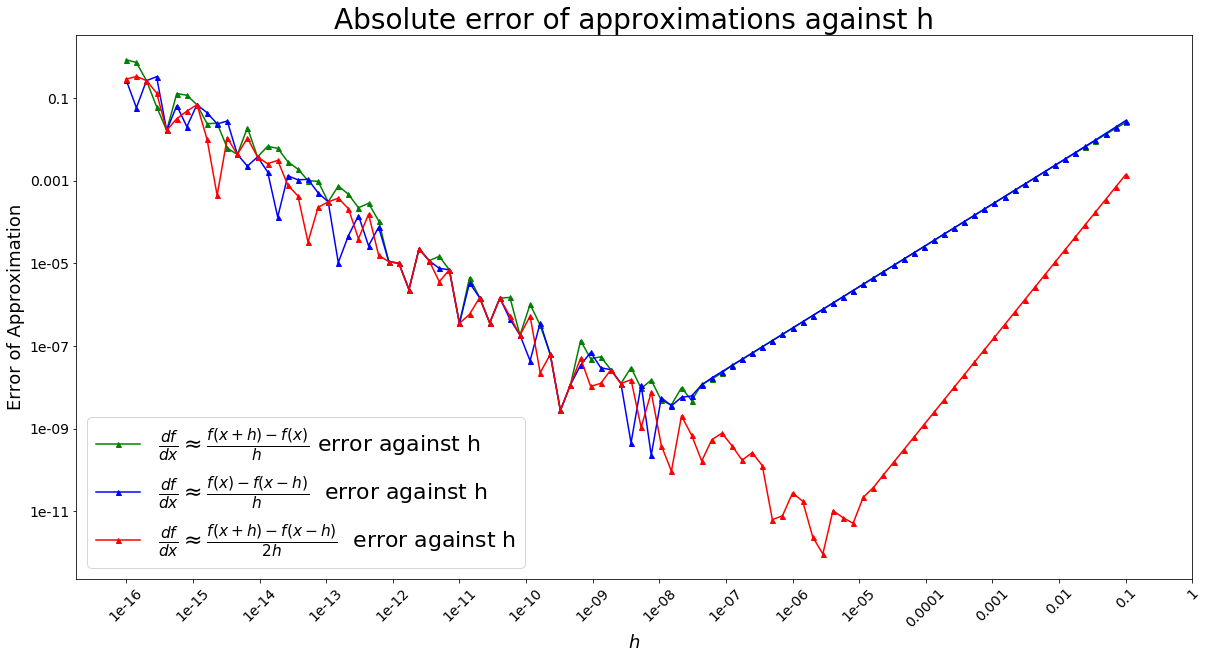

In [14]:
#Note that (d/dx)cos(x)=-sin(x)

err1=abs(est1_list+np.sin(1)) #Compute absolute error for forward approximation
err2=abs(est2_list+np.sin(1)) #Compute absolute error for backward approximation
err3=abs(est3_list+np.sin(1)) #Compute absolute error for centered approximation

print('Graphical representation of results:')

fig,ax=plt.subplots(1,1,figsize=(20, 10)) #Create one (sub)plot

#Plot the h-values against the absolute errors for each method
ax.plot(h,err1,'g^-',markersize=5, label=r'$\frac{df}{dx} \approx \frac{f(x+h)-f(x)}{h}$ error against h')
ax.plot(h,err2,'b^-',markersize=5, label=r'$\frac{df}{dx} \approx \frac{f(x)-f(x-h)}{h}$  error against h')
ax.plot(h,err3,'r^-',markersize=5, label=r'$\frac{df}{dx} \approx \frac{f(x+h)-f(x-h)}{2h}$  error against h')

ax.set_yscale('log',basey=10) #Set log-log scale with bases in 10
ax.set_xscale('log', basex=10)

#Create y and x-ticks corresponding to log-scale
ax.set_xticks([10**(-i) for i in range(0,17)])
ax.set_yticks([10**(-i) for i in range(1,12,2)])
ax.set_xticklabels([10**(-i) for i in range(0,17)],rotation=45, fontsize=14)
ax.set_yticklabels([10**(-i) for i in range(1,12,2)], fontsize=14)

#Set labels, legend, and title:
ax.set_ylabel('Error of Approximation', fontsize=18)
ax.set_xlabel(r'$h$', fontsize=18)
ax.set_title(r'Absolute error of approximations against h', fontsize=28)
ax.legend(loc='lower left', fontsize=22)

ax.minorticks_off() #Turn off annoying small ticks on y-axis


plt.show() #Show graph!

**4.3**
Describe and interpret your results in no more than 250 words.

*Hint: run the code below.*

**[3 marks]**

In [ ]:
h = 1e-15
print(1 + h - 1)
print((1 + h - 1)/h)

📝 ***Discussion for question 4.3***

For $h \lessapprox10^{-8}$ the computed approximations display similar accuracy. Absolute errors of the shown magnitudes arise for $h \lessapprox10^{-8}$ because many Python floats are inaccurate beyond 16 significant figures (see task 1.3). Python uses its (binary) representation of numbers to compute sums (or differences) and then rounds the result to a number it can represent (2.3). For any $h = 10^{-z}$, imprecise numbers get amplified by $h = 10^{z}$, as numerators are divided by $h$ (or $2h$). As h increases, less inaccurate digits get amplified.

Forward ($D_1(x)$) and backward ($D_{-1}(x)$) approximations are most accurate for $h \approx 10^{-8}$ since they are both first order accurate (as can be dervied from Taylor expansion (tutorial 7)):
$$
D_1(x) - F'(x) = \frac{h}{2} F''(x) + \frac{h^2}{6} F'''(x) + \dots = O(h)
$$

$$
  D_{-1}(x) - F'(x)
  = \frac{-h}{2} F''(x) + \frac{h^2}{6} F'''(x) + \dots = O(h)
$$

For $h \approx 10^{-8}$, rounding errors only magnify imprecise figures from Python's decimal representation by $\approx 10^{8}$ and the forward and backward approximation formulae are accurate to $\approx 10^{-8}$. As $h > 10^{-8}$, forward and backward approximations become less accurate at a (log-log) linear rate due to their error expressions. Although their errors seemingly coincide for $h \gtrapprox 10^{-7}$, there are still small differences in their (written out) error expressions.



Central difference approximation is the average of the other methods. For $h < 10^{-8}$, it suffers from error for the same reasons as the others. However, for $10^{-8} \lessapprox h \lessapprox 10^{-5}$ the central method is more accurate due to its second order accuracy (derived from formulae above):

$$
  D_C(x) - F'(x)
  = \frac{h^2}{6} F'''(x) + \frac{h^4}{120} F^{(5)}(x) + \dots = O(h^2)
$$

For $10^{-8} \lessapprox h \lessapprox 10^{-5}$, the central diff. method's actual error (as shown in above expression) is very close to zero ($\lessapprox 10^{-10}F'''(x)$) and inaccurate numbers from Python's decimal representation are decreasingly amplified. For $h \gtrapprox 10^{-5}$, however, the number of inaccurate figures getting amplified < 6. Thus, the error increases log-log linearly due to the error expression $D_C(x) - F'(x)$ (for $h > 10^{-5}$, $D_C(x) - F'(x) > \frac{10^{-10}}{6}F'''(x)$).
